# matplotlib plotting in Python
Note, the content of this notebook is available as a tutorial in [datacamp.io](https://campus.datacamp.com/courses/intermediate-python-for-data-science/). This is just a quick reference sheet.

## Basic line plots - population growth

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

**Note**: You need `%matplotlib inline` command when plotting in Jupyter notebook. Not in scripts.
Additionally when runnning scripts, use the `plt.show()` to bring up the plot

Read the accompanying csv containing world population projection

In [2]:
pop_csv = pd.read_csv('world_pop_predictions.csv')
pop_csv.head()

,year,population
0,1950,2.53
1,1951,2.57
2,1952,2.62
3,1953,2.67
4,1954,2.71


Now that we have the data, let us read this dataframe into two lists, one for year and another for population. We could plot using pandas, but more of that later.

In [3]:
years = pop_csv.year
years = list(years)
pop = list(pop_csv.population)

Now let us create a simple line plot using matplotlib. Use `plot` command to create a line plot. 1st arg is X axis and 2nd is Y axis.

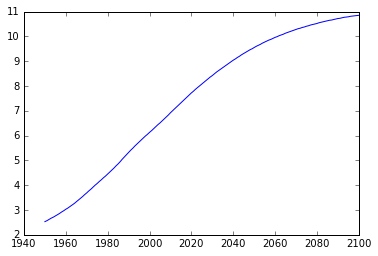

In [4]:
plt.plot(years, pop)

You can customize this by specifying color, width etc

#### Plot customization
You can add labels to axes, change the text displayed for labels and add title to the plot. 
**Note**: When running in scripts, call the `plt.show()` after adding the customizations to the plot

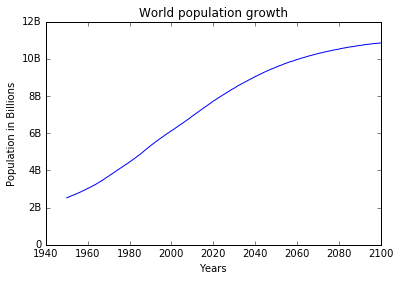

In [5]:
my_plot = plt.plot(years, pop) #storing in variable my_plot just to avoid prints to terminal
plt.xlabel('Years')
plt.ylabel('Population in Billions')
plt.title('World population growth')

#specify the ticks in first arg and labels for ticks in optional second arg
ticks = plt.yticks([0,2,4,6,8,10,12], 
           ['0','2B','4B','6B','8B','10B','12B'])


## Basic scatter
For making scatter plots, let us read the second csv containing world population, gdp per capita and life expectancy

In [6]:
pd_world_economics = pd.read_csv('world_gdp_pop_life_exp.csv')
pd_world_economics.head()

,Population_Billions,GDP_percap,life_exp
0,31.889923,974.580338,43.828
1,3.600523,5937.029526,76.423
2,33.333216,6223.367465,72.301
3,12.420476,4797.231267,42.731
4,40.301927,12779.379640,75.320


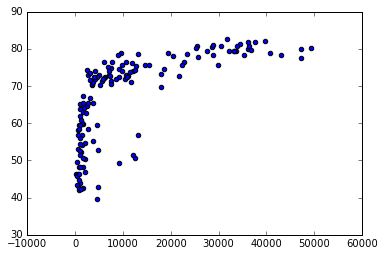

In [7]:
country_pop = list(pd_world_economics.Population_Billions)
gdp_cap = list(pd_world_economics.GDP_percap)
life_exp = list(pd_world_economics.life_exp)

# create a scatter plot of population and gdp per capita
my_scat = plt.scatter(gdp_cap, life_exp)

#### Changing the scale of an axis - log
The scatter above is not very useful since the scale of X axis and the dispersion of values is so varied. Let us represent this in log

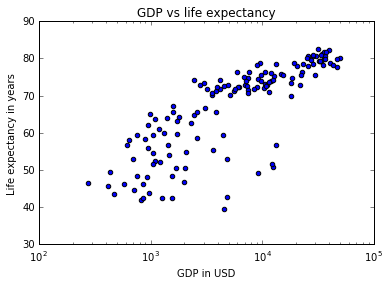

In [8]:
my_scat = plt.scatter(gdp_cap, life_exp)
plt.xscale('log')
plt.title('GDP vs life expectancy')
plt.xlabel('GDP in USD')
plt.ylabel('Life expectancy in years')

#### Customizing the symbols drawn
Now let us try to represent the population column available to us. Use that to represent the size of the circles. In matplotlib, you cannot give conditional arguments for color or size. But need to create another list that contains the size and color for each of the variable.

So, let us create a size and color vector, both correspond to the population. To understand how the population is distributed, let us plot that as a histogram

In [31]:
len(country_pop)

142

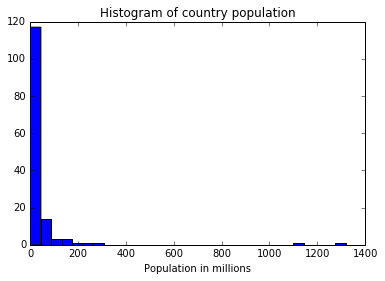

In [9]:
pop_hist = plt.hist(country_pop, bins=30)
plt.title('Histogram of country population')
plt.xlabel('Population in millions')

Thus most countries have a population of less than 100 million. Further, the `hist()` method plotting the histogram bins the dataset into 10 buckets by default. You can increase or decrease it to better represent the dataset.

Now, let us specify the population value as the size vector for the scatter plot.

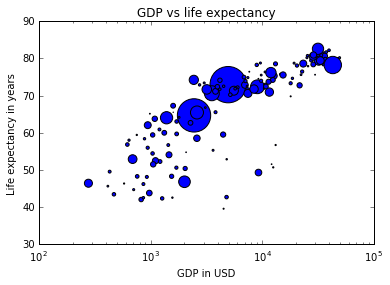

In [11]:
my_scat = plt.scatter(gdp_cap, life_exp, s=country_pop) #specify size vector to the 's' parameter.
plt.xscale('log')
plt.title('GDP vs life expectancy')
plt.xlabel('GDP in USD')
plt.ylabel('Life expectancy in years')

### Colorize the scatter plot
Now let us specify a color vector. For this, let us calculate classed color renderer. Split the population into quantiles and assign 'blue', 'green', 'yellow', 'red' to each quartile. Use the `alpha` parameter to specify the transparency. 0=fully transparent and 1=opaque.

Let us calculate the color vector:

In [14]:
# use np.percentile and specify the %
q1 = np.percentile(country_pop, 25)
q2 = np.percentile(country_pop, 50)
q3 = np.percentile(country_pop, 75)
print('q1: ' + str(q1) + 'q2: ' + str(q2) + 'q3: ' + str(q3))

q1: 4.5080335q2: 10.517531q3: 31.21004175


In [18]:
color = []
for i in country_pop:
    if i <= q1: color.append('blue')
    elif i > q1 and i <=q2: color.append('green')
    elif i > q2 and i <=q3: color.append('yellow')
    else: color.append('red')

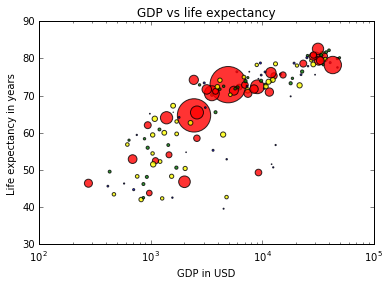

In [20]:
#specify size vector to the 's' parameter, color to 'c' parameter and transparency to 'alpha'
my_scat = plt.scatter(gdp_cap, life_exp, s=country_pop, c=color, alpha=0.8) 
plt.xscale('log')
plt.title('GDP vs life expectancy')
plt.xlabel('GDP in USD')
plt.ylabel('Life expectancy in years')

### Adding text and grid lines
Use the `plt.Text()` and `plt.grid()` to add text and grid lines to the plot

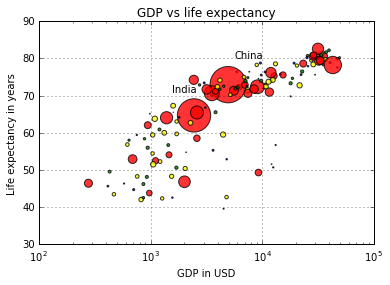

In [21]:
my_scat = plt.scatter(gdp_cap, life_exp, s=country_pop, c=color, alpha=0.8)
plt.xscale('log')
plt.title('GDP vs life expectancy')
plt.xlabel('GDP in USD')
plt.ylabel('Life expectancy in years')
plt.text(1550, 71, 'India') # specify the x, y, text
plt.text(5700, 80, 'China')
plt.grid(True)

## Basic histograms
Histograms plot the frequency of a variable. The values of the variable is in X axis and number of occurrences in that range in is Y. By default, the `plt.hist()` function bins it into 10 groups, but you can customize it to be meaningful:

(array([ 2.,  2.,  4.,  1.,  2.,  4.,  0.,  0.,  4.,  1.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

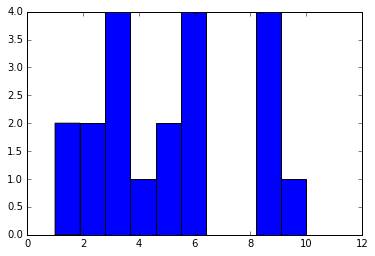

In [14]:
# let us make a histogram of the random numbers we generated
plt.hist(random_numbers)

(array([ 4.,  5.,  6.,  0.,  5.]),
 array([  1. ,   2.8,   4.6,   6.4,   8.2,  10. ]),
 <a list of 5 Patch objects>)

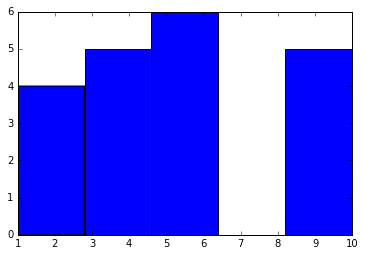

In [15]:
# lets reduce the bins to 5
plt.hist(random_numbers, 5)

Adjusting the bins as above shows the values to be approximately normally distributed which we would have missed with earlier binning